In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time
from datetime import datetime
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [50]:
files = sorted(glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\서울시 개인서비스 요금 정보\*.csv'),reverse=True)
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\서울시 개인서비스 요금 정보\\서울시 개인서비스 요금 정보.csv']

In [51]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,업소일련번호,업소명,동명,주소,면적(㎡),전화번호,업종,품목코드,품목,가격(원),점검일자,구명
0,1649139807273,카페시벳,신림동,서울특별시 관악구 신원로4길 6 (신림동),NaN,02-858-9973,다방업,1418622761387,다방 국산차(녹차),3800.0,2022-12-26 13:12:10.0,관악구
1,1649139807273,카페시벳,신림동,서울특별시 관악구 신원로4길 6 (신림동),NaN,02-858-9973,다방업,1418622761397,커피(외식),3500.0,2022-12-26 13:12:10.0,관악구
2,1418890669408,고려숯불갈비,신림동,서울특별시 관악구 신원로4길 46 삼겹살-국내산 (신림동),NaN,02-851-8938,한식,1418622761370,갈비탕,8000.0,2022-12-26 13:11:41.0,관악구
3,1418890669408,고려숯불갈비,신림동,서울특별시 관악구 신원로4길 46 삼겹살-국내산 (신림동),NaN,02-851-8938,한식,1418622761413,불고기,10000.0,2022-12-26 13:11:41.0,관악구
4,1418890669408,고려숯불갈비,신림동,서울특별시 관악구 신원로4길 46 삼겹살-국내산 (신림동),NaN,02-851-8938,한식,1418622761372,된장찌개 백반,7000.0,2022-12-26 13:11:41.0,관악구


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6035 entries, 0 to 6034
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업소일련번호  6035 non-null   int64  
 1   업소명     6035 non-null   object 
 2   동명      6035 non-null   object 
 3   주소      6034 non-null   object 
 4   면적(㎡)   403 non-null    object 
 5   전화번호    5707 non-null   object 
 6   업종      6035 non-null   object 
 7   품목코드    6035 non-null   int64  
 8   품목      6035 non-null   object 
 9   가격(원)   5816 non-null   float64
 10  점검일자    6035 non-null   object 
 11  구명      6035 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 565.9+ KB


In [53]:
df.describe()

,업소일련번호,품목코드,가격(원)
count,6.035000e+03,6.035000e+03,5816.000000
mean,1.473574e+12,1.418903e+12,14301.074106
std,8.323824e+10,4.034000e+09,17260.443766
min,1.418891e+12,1.418623e+12,0.000000
25%,1.418891e+12,1.418623e+12,6000.000000
50%,1.418891e+12,1.418623e+12,9000.000000
75%,1.525408e+12,1.418623e+12,16000.000000
max,1.670291e+12,1.476952e+12,544500.000000


In [54]:
df.describe(include=np.object)

,업소명,동명,주소,면적(㎡),전화번호,업종,품목,점검일자,구명
count,6035,6035,6034,403,5707,6035,6035,6035,6035
unique,2895,202,2808,88,2870,13,43,1014,25
top,김밥천국,망우동,서울특별시 광진구 아차산로 272 (자양동 더샵스타시티),0,02-0000-0000,한식,미용료 (커트),2022-11-30 00:00:00.0,광진구
freq,72,832,17,167,49,2054,565,2090,2205


In [55]:
df.isnull().sum()

업소일련번호       0
업소명          0
동명           0
주소           1
면적(㎡)     5632
전화번호       328
업종           0
품목코드         0
품목           0
가격(원)      219
점검일자         0
구명           0
dtype: int64

**가격 분포?**

**일별 서비스 이용 수?**

**구별 서비스 이용 수?**

**품목별 서비스 이용 수?**

**업종별 서비스 이용 수 많은 구 top5?**

**업종별 평균 가격은?**	

**품목별 평균 가격은?**

## 전처리

In [56]:
df.drop(['업소일련번호','주소','업소명','품목코드','전화번호'],axis=1,inplace=True)

In [57]:
def convert_date(x):
    dat = x.split()[0]
    dat = datetime.strptime(dat,'%Y-%m-%d')
    return str(dat.month)+'.'+str(dat.day).zfill(2)

df['점검일자'] = df['점검일자'].apply(convert_date)

In [58]:
df = df.fillna(0)

In [59]:
p = re.compile('[0-9.]+')
def convert_area(x):
    area = p.findall(x)[0]
    return area
df = df.astype({'면적(㎡)':'str'})
df['면적(㎡)'] = df['면적(㎡)'].apply(convert_area)

In [60]:
df = df.astype({'면적(㎡)':'float'})

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6035 entries, 0 to 6034
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   동명      6035 non-null   object 
 1   면적(㎡)   6035 non-null   float64
 2   업종      6035 non-null   object 
 3   품목      6035 non-null   object 
 4   가격(원)   6035 non-null   float64
 5   점검일자    6035 non-null   object 
 6   구명      6035 non-null   object 
dtypes: float64(2), object(5)
memory usage: 330.2+ KB


In [62]:
df.describe()

,면적(㎡),가격(원)
count,6035.000000,6035.000000
mean,5.150273,13782.112179
std,66.051321,17154.112699
min,0.000000,0.000000
25%,0.000000,6000.000000
50%,0.000000,8000.000000
75%,0.000000,15000.000000
max,3300.000000,544500.000000


In [63]:
df.describe(include=np.object)

,동명,업종,품목,점검일자,구명
count,6035,6035,6035,6035,6035
unique,202,13,43,20,25
top,망우동,한식,미용료 (커트),11.30,광진구
freq,832,2054,565,2090,2205


## 시각화

[Text(0.5, 1.0, '가격 분포')]

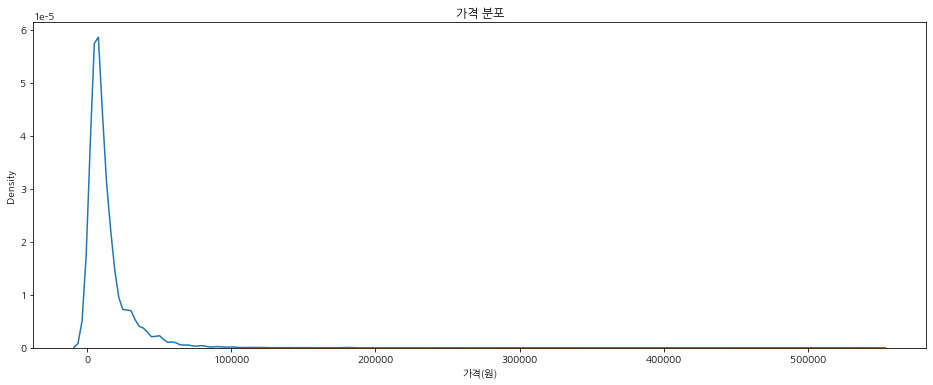

In [69]:
plt.figure(figsize=(16,6))
sns.kdeplot(data=df['가격(원)']).set(title='가격 분포')

[Text(0.5, 1.0, '일별 서비스 이용 수'), Text(0, 0.5, 'count')]

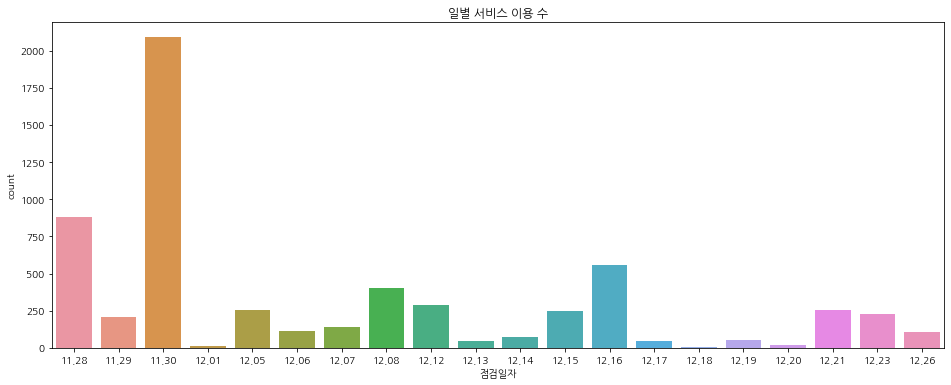

In [75]:
sub_df = df.groupby(['점검일자'],as_index=False)['품목'].count()
plt.figure(figsize=(16,6))
sns.barplot(data=sub_df,x='점검일자',y='품목').set(title='일별 서비스 이용 수',ylabel='count')

[Text(0.5, 1.0, '구별 서비스 이용 수'), Text(0, 0.5, 'count')]

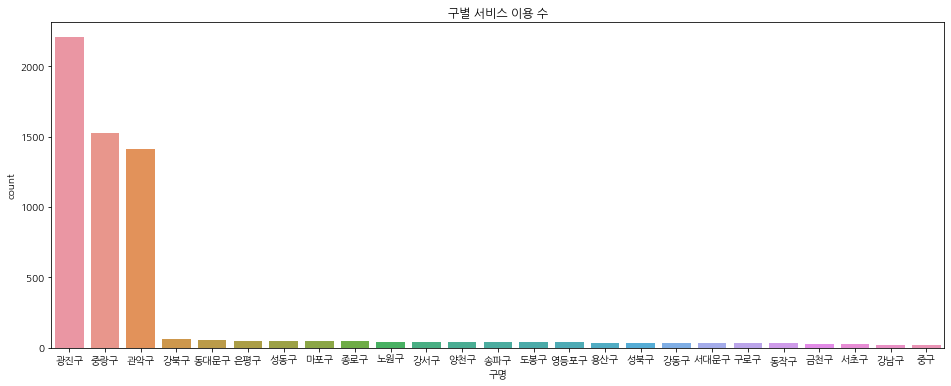

In [76]:
sub_df = df.groupby(['구명'],as_index=False)['품목'].count().sort_values('품목',ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(data=sub_df,x='구명',y='품목').set(title='구별 서비스 이용 수',ylabel='count')

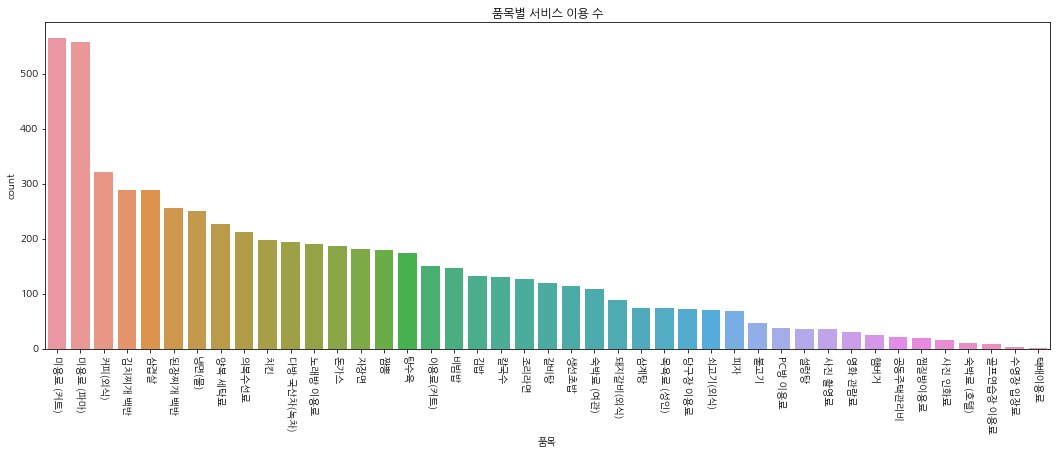

In [78]:
sub_df = df.groupby(['품목'],as_index=False)['점검일자'].count().sort_values('점검일자',ascending=False)
plt.figure(figsize=(18,6))
sns.barplot(data=sub_df,x='품목',y='점검일자').set(title='품목별 서비스 이용 수',ylabel='count')
g=plt.xticks(rotation=-90)

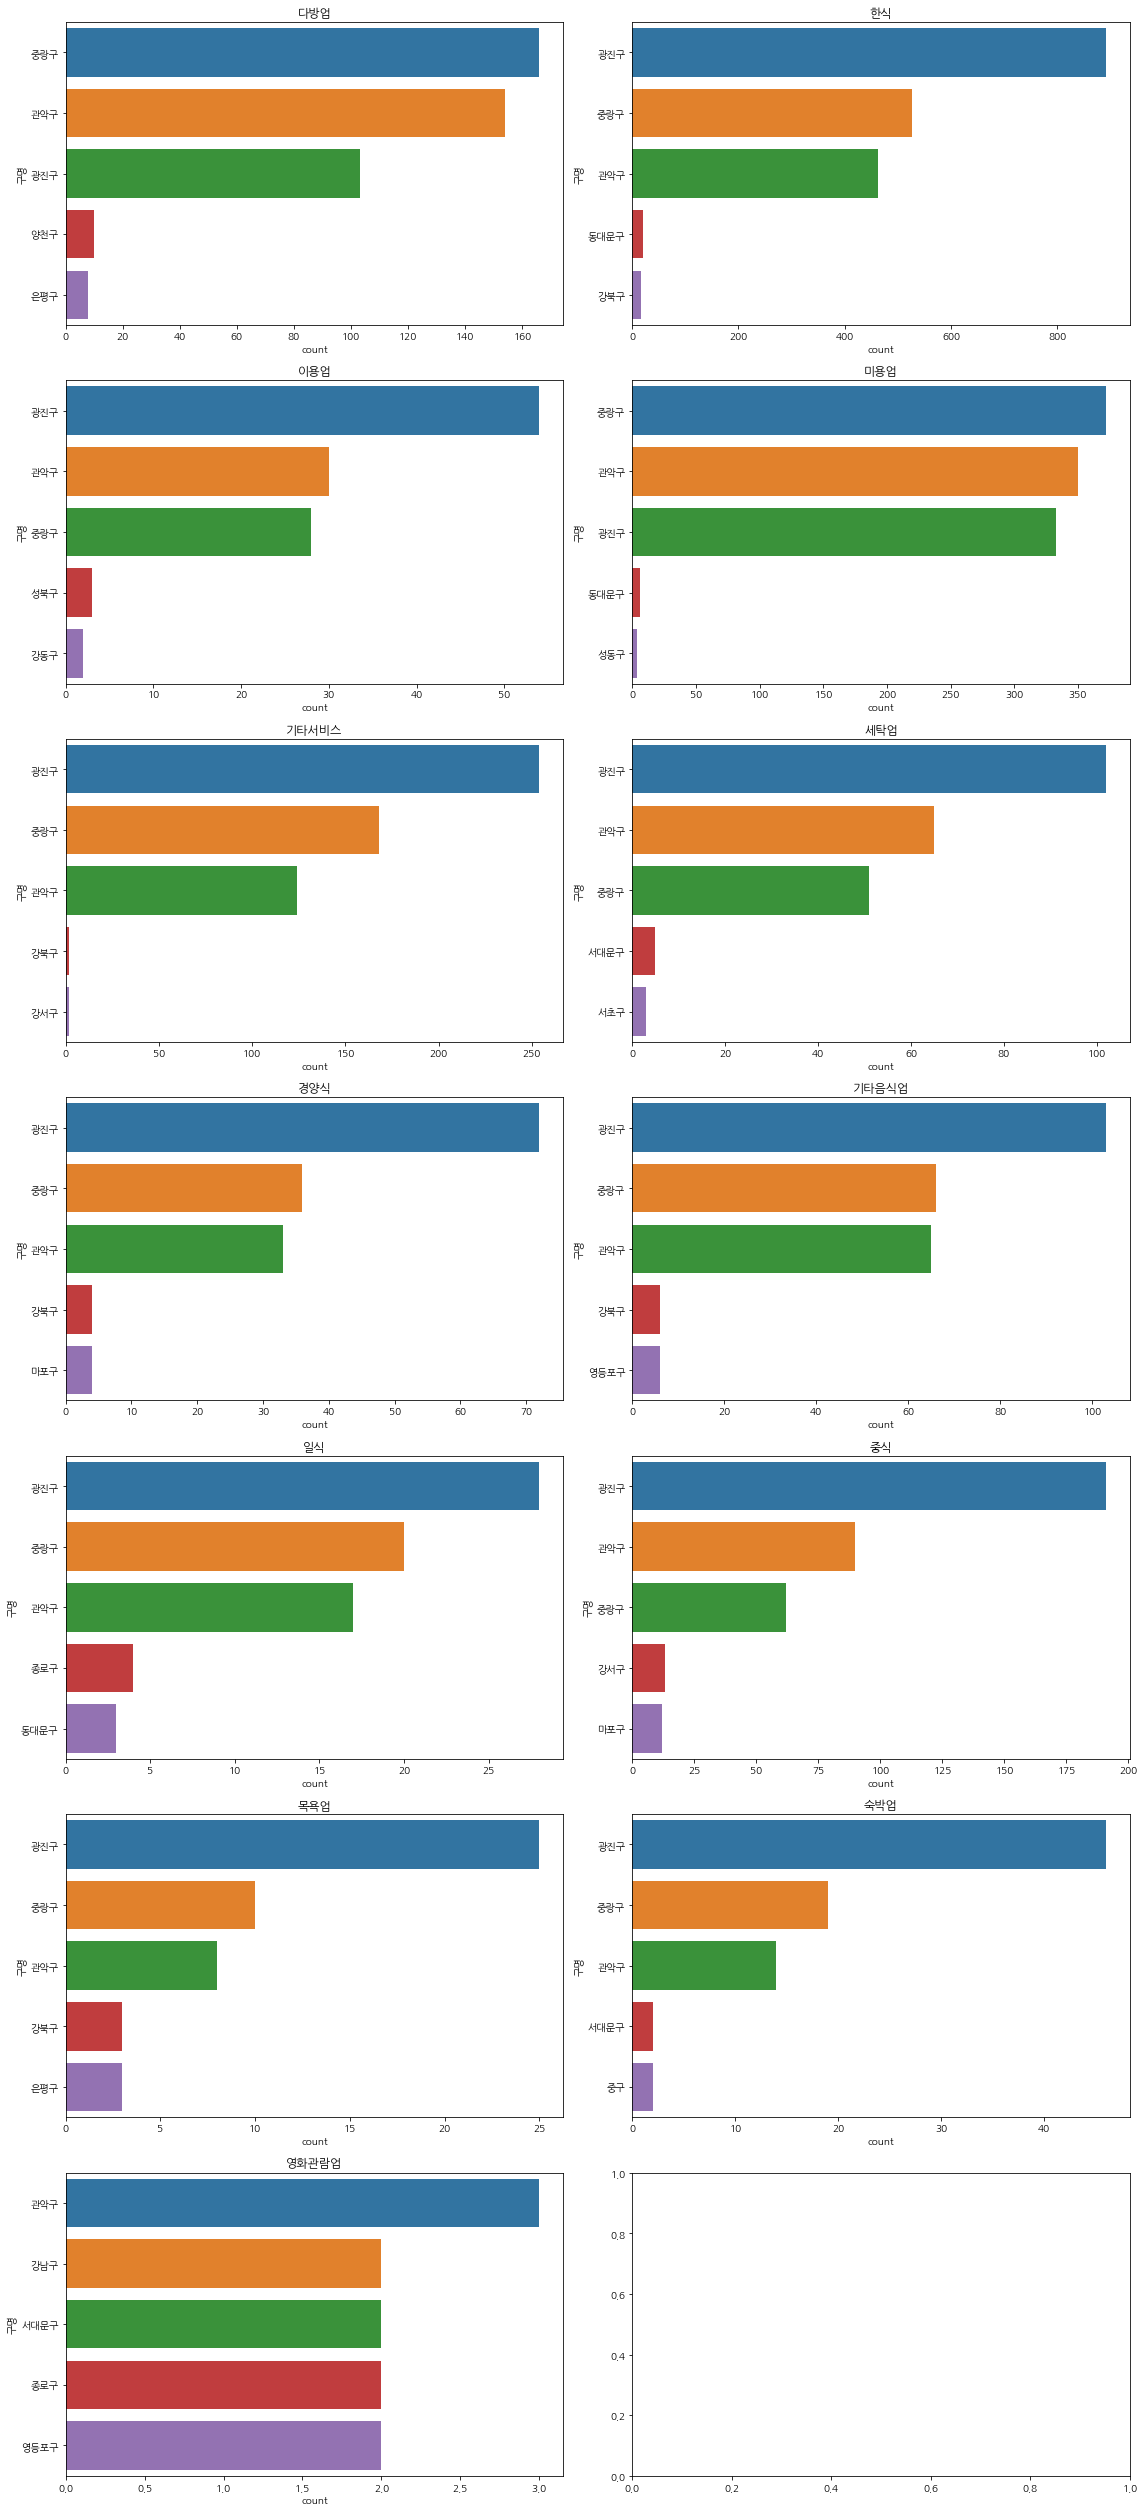

In [83]:
fig,axes = plt.subplots(7,2,figsize=(16,35))
for i,c in enumerate(df['업종'].unique()):
    sub_df = df[df['업종']==c].groupby(['구명'],as_index=False)['품목'].count().sort_values('품목',ascending=False)
    sns.barplot(data=sub_df.head(),x='품목',y='구명',ax=axes[i//2][i%2]).set(title=f'{c}',xlabel='count')
plt.tight_layout()

[Text(0.5, 1.0, '업종별 평균 가격')]

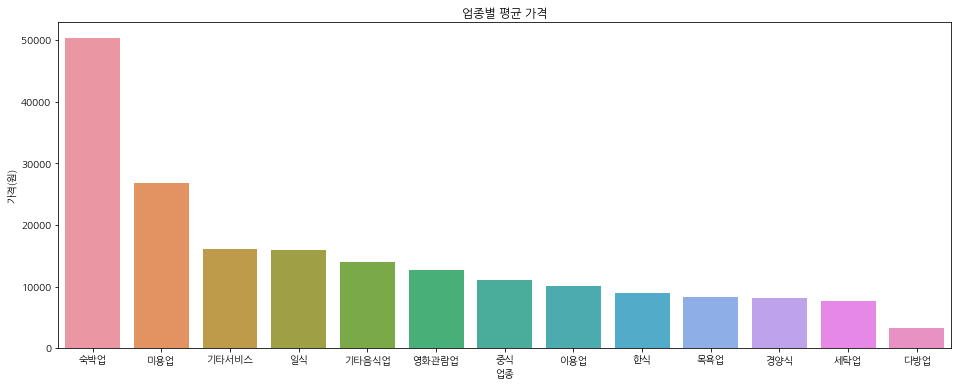

In [84]:
sub_df = df.groupby(['업종'],as_index=False)['가격(원)'].mean().sort_values('가격(원)',ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(data=sub_df,x='업종',y='가격(원)').set(title='업종별 평균 가격')

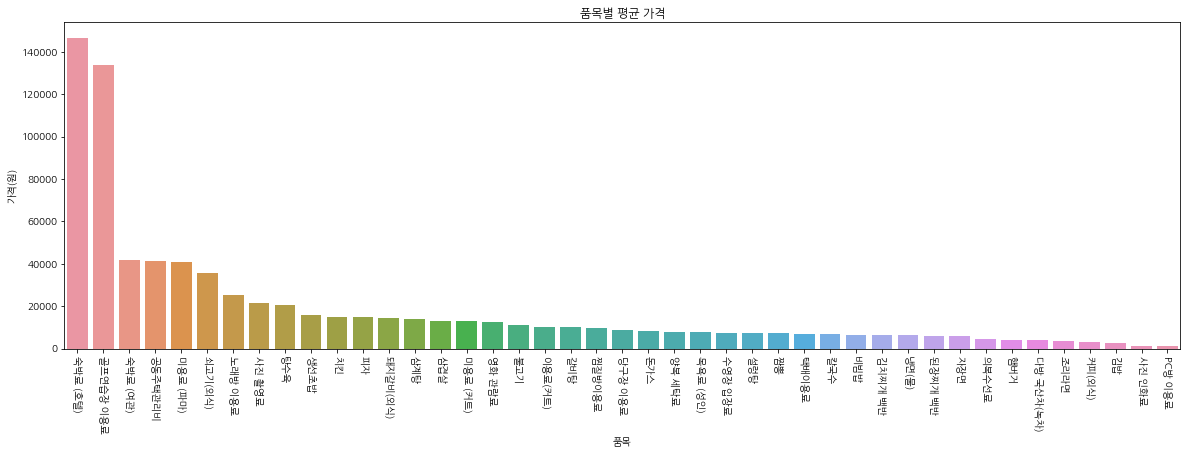

In [86]:
sub_df = df.groupby(['품목'],as_index=False)['가격(원)'].mean().sort_values('가격(원)',ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(data=sub_df,x='품목',y='가격(원)').set(title='품목별 평균 가격')
g=plt.xticks(rotation=-90)

## 분석 결과

**가격 분포?**

- 6000-15000원에 주로 분포하고 544500의 최대값을 가진다.

**일별 서비스 이용 수?**

- 11월 말에 특히 이용수가 많고 다른 날은 주기적인 등락을 보인다.

**구별 서비스 이용 수?**

- 광진구,중랑구,관악구가 특히 높고 나머지는 비슷한 이용 수를 보인다.

**품목별 서비스 이용 수?**

- 미용,커피,한식,세탁,수선 순으로 이용 수가 많다.

**업종별 서비스 이용 수 많은 구 top5?**

- 중랑구는 다방업,미용업에서 가장 높다.

- 영화관람업은 관악구가 가장 높다.

- 나머지는 광진구가 가장 높다.

**업종별 평균 가격은?**	

- 숙박업이 가장 높고 미용업,기타서비스,일식 순으로 높다.

**품목별 평균 가격은?**

- 호텔 숙박료가 가장 높고 골프이용료,여관숙박료,공동주택관리비,미용료(파마),소고기(외식) 순으로 높다.

## 분석 결과에 대한 생각

- 각 업종에 대한 지역별 서비스 이용 수가 상이하므로 지역에 따른 맞춤형 사업 전략을 펼칠 수 있을 것 같다.

- 광진구의 숙박업 이용이 가장 많은 것을 보았을 때 광진구 주변에 다양한 관광지,랜드마크 등이 있을 것으로 추정된다.